In [2]:
# importing Pandas and requests libraries
import pandas as pd 
import requests

# Data Gathering

In [3]:
# first file
twitter_archive_df = pd.read_csv('twitter-archive-enhanced.csv')
twitter_archive_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [4]:
# second file
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
with open('image-predictions.tsv',mode='wb') as file:
    file.write(response.content)
img_prediction_df = pd.read_csv('image-predictions.tsv',sep='\t')

In [5]:
img_prediction_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [6]:
# import tweepy
# from tweepy import OAuthHandler
# import json
# from timeit import default_timer as timer

## Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
## These are hidden to comply with Twitter's API terms and conditions

# consumer_key = 'HIDDEN'
# consumer_secret = 'HIDDEN'
# access_token = 'HIDDEN'
# access_secret = 'HIDDEN'

# auth = OAuthHandler(consumer_key, consumer_secret)
# auth.set_access_token(access_token, access_secret)

# api = tweepy.API(auth, wait_on_rate_limit=True)

In [7]:
## NOTE TO REVIEWER: this student had mobile verification issues so the following
## Twitter API code was sent to this student from a Udacity instructor

## Tweet IDs for which to gather additional data via Twitter's API

# tweet_ids = twitter_archive_df.tweet_id.values
# len(tweet_ids)

## Query Twitter's API for JSON data for each tweet ID in the Twitter archive

#count = 0
#fails_dict = {}
#start = timer()

In [6]:
# third file
# importing json library
import json

json_list = []

with open('tweet-json copy', 'r') as json_file:
    for data in json_file:
        json_data = json.loads(data)
        json_list.append({'tweet_id': json_data['id'],
                        'retweet_count': json_data['retweet_count'],
                        'favorite_count': json_data['favorite_count']
                       })
        
tweet_df = pd.DataFrame(json_list, columns = ['tweet_id', 'retweet_count', 'favorite_count'])

In [7]:
tweet_df.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


# Data Assessing

In [8]:
twitter_archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [9]:
twitter_archive_df.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
807,771908950375665664,NaN,NaN,2016-09-03 03:13:29 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Doggo will persevere. 13/10\nhttps://t.co/yOVz...,NaN,NaN,NaN,https://twitter.com/yahoonews/status/771905568...,13,10,None,doggo,None,None,None
1534,689993469801164801,NaN,NaN,2016-01-21 02:10:37 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",Here we are witnessing a rare High Stepping Al...,NaN,NaN,NaN,https://vine.co/v/ienexVMZgi5,12,10,None,None,floofer,None,None
1571,687704180304273409,NaN,NaN,2016-01-14 18:33:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Blakely. He thinks that's a hat. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/687704180...,9,10,Blakely,None,None,pupper,None
1453,695629776980148225,NaN,NaN,2016-02-05 15:27:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Calvin. He's proof that degrees mean abso...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/695629776...,8,10,Calvin,None,None,None,None
1785,677644091929329666,NaN,NaN,2015-12-18 00:18:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a dog swinging. I really enjoyed it so...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/677644091...,11,10,a,None,None,None,None


In [10]:
twitter_archive_df.tail(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


In [11]:
twitter_archive_df.source.loc[0]

'<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>'

In [12]:
twitter_archive_df[twitter_archive_df.tweet_id.duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [13]:
twitter_archive_df.name.value_counts()

None         745
a             55
Charlie       12
Oliver        11
Cooper        11
Lucy          11
Tucker        10
Lola          10
Penny         10
Winston        9
Bo             9
the            8
Sadie          8
Bailey         7
Daisy          7
an             7
Buddy          7
Toby           7
Rusty          6
Stanley        6
Koda           6
Dave           6
Jack           6
Jax            6
Bella          6
Milo           6
Oscar          6
Leo            6
Scout          6
Gus            5
            ... 
Chase          1
Corey          1
Hall           1
Cora           1
Ridley         1
Dylan          1
Charleson      1
Divine         1
Ike            1
Cermet         1
Tedrick        1
Julio          1
Theo           1
Holly          1
Venti          1
Steve          1
Willy          1
Kawhi          1
Tobi           1
Jo             1
Snoop          1
Tebow          1
Hector         1
Beemo          1
Beya           1
Genevieve      1
Ferg           1
Wiggles       

In [14]:
print(twitter_archive_df.name.loc[twitter_archive_df.name.str.islower()].unique())

['such' 'a' 'quite' 'not' 'one' 'incredibly' 'mad' 'an' 'very' 'just' 'my'
 'his' 'actually' 'getting' 'this' 'unacceptable' 'all' 'old' 'infuriating'
 'the' 'by' 'officially' 'life' 'light' 'space']


In [15]:
twitter_archive_df.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [16]:
twitter_archive_df.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [17]:
twitter_archive_df[(twitter_archive_df.doggo == 'None') & (twitter_archive_df.floofer == 'None') & (twitter_archive_df.pupper == 'None') & (twitter_archive_df.puppo == 'None')]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
10,890006608113172480,NaN,NaN,2017-07-26 00:31:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Koda. He is a South Australian decksha...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890006608...,13,10,Koda,None,None,None,None


In [18]:
twitter_archive_df[((twitter_archive_df.doggo != 'None') & (twitter_archive_df.floofer != 'None')) | ((twitter_archive_df.pupper != 'None') & (twitter_archive_df.puppo != 'None'))]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
200,854010172552949760,NaN,NaN,2017-04-17 16:34:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...","At first I thought this was a shy doggo, but i...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/854010172...,11,10,None,doggo,floofer,None,None


In [19]:
twitter_archive_df[((twitter_archive_df.doggo != 'None') & (twitter_archive_df.pupper != 'None')) | ((twitter_archive_df.floofer != 'None') & (twitter_archive_df.puppo != 'None'))]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
460,817777686764523521,NaN,NaN,2017-01-07 16:59:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Dido. She's playing the lead role in ""...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/817777686...,13,10,Dido,doggo,None,pupper,None
531,808106460588765185,NaN,NaN,2016-12-12 00:29:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have Burke (pupper) and Dexter (doggo)...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/808106460...,12,10,None,doggo,None,pupper,None
565,802265048156610565,7.331095e+17,4.196984e+09,2016-11-25 21:37:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Like doggo, like pupper version 2. Both 11/10 ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/802265048...,11,10,None,doggo,None,pupper,None
575,801115127852503040,NaN,NaN,2016-11-22 17:28:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bones. He's being haunted by another d...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/801115127...,12,10,Bones,doggo,None,pupper,None
705,785639753186217984,NaN,NaN,2016-10-11 00:34:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Pinot. He's a sophisticated doggo. You...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/785639753...,10,10,Pinot,doggo,None,pupper,None
733,781308096455073793,NaN,NaN,2016-09-29 01:42:20 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...","Pupper butt 1, Doggo 0. Both 12/10 https://t.c...",NaN,NaN,NaN,https://vine.co/v/5rgu2Law2ut,12,10,None,doggo,None,pupper,None
778,775898661951791106,NaN,NaN,2016-09-14 03:27:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: Like father (doggo), like son (...",7.331095e+17,4.196984e+09,2016-05-19 01:38:16 +0000,https://twitter.com/dog_rates/status/733109485...,12,10,None,doggo,None,pupper,None
822,770093767776997377,NaN,NaN,2016-08-29 03:00:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is just downright precious...,7.410673e+17,4.196984e+09,2016-06-10 00:39:48 +0000,https://twitter.com/dog_rates/status/741067306...,12,10,just,doggo,None,pupper,None
889,759793422261743616,NaN,NaN,2016-07-31 16:50:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Meet Maggie &amp; Lila. Maggie is the doggo, L...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/759793422...,12,10,Maggie,doggo,None,pupper,None
956,751583847268179968,NaN,NaN,2016-07-09 01:08:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Please stop sending it pictures that don't eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/751583847...,5,10,None,doggo,None,pupper,None


In [20]:
twitter_archive_df[((twitter_archive_df.doggo != 'None') & (twitter_archive_df.puppo != 'None')) | ((twitter_archive_df.floofer != 'None') & (twitter_archive_df.pupper != 'None'))]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
191,855851453814013952,NaN,NaN,2017-04-22 18:31:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo participating in the #ScienceMa...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/855851453...,13,10,None,doggo,None,None,puppo


In [21]:
index_list = [191,200,460,531,565,575,705,733,778,822,889,956,1063,1113]
twitter_archive_df.text.iloc[index_list]

191     Here's a puppo participating in the #ScienceMa...
200     At first I thought this was a shy doggo, but i...
460     This is Dido. She's playing the lead role in "...
531     Here we have Burke (pupper) and Dexter (doggo)...
565     Like doggo, like pupper version 2. Both 11/10 ...
575     This is Bones. He's being haunted by another d...
705     This is Pinot. He's a sophisticated doggo. You...
733     Pupper butt 1, Doggo 0. Both 12/10 https://t.c...
778     RT @dog_rates: Like father (doggo), like son (...
822     RT @dog_rates: This is just downright precious...
889     Meet Maggie &amp; Lila. Maggie is the doggo, L...
956     Please stop sending it pictures that don't eve...
1063    This is just downright precious af. 12/10 for ...
1113    Like father (doggo), like son (pupper). Both 1...
Name: text, dtype: object

In [22]:
img_prediction_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [23]:
img_prediction_df.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1615,802247111496568832,https://pbs.twimg.com/media/Cs_DYr1XEAA54Pu.jpg,1,Chihuahua,0.721188,True,toy_terrier,0.112943,True,kelpie,0.053365,True
1891,849051919805034497,https://pbs.twimg.com/media/C8hwNxbXYAAwyVG.jpg,1,fountain,0.997509,False,American_black_bear,0.001413,False,sundial,0.000681,False
380,673295268553605120,https://pbs.twimg.com/media/CVgGc9hWIAIe1bn.jpg,1,golden_retriever,0.889241,True,Labrador_retriever,0.064683,True,Great_Pyrenees,0.012613,True
154,668779399630725120,https://pbs.twimg.com/media/CUf7UIaWUAEuKFr.jpg,1,Chesapeake_Bay_retriever,0.285508,True,Weimaraner,0.146832,True,black-footed_ferret,0.060865,False
734,686947101016735744,https://pbs.twimg.com/media/CYiGvn-UwAEe4wL.jpg,1,refrigerator,0.799795,False,medicine_chest,0.182538,False,ice_bear,0.001431,False


In [24]:
img_prediction_df.tail(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


In [25]:
img_prediction_df[img_prediction_df.tweet_id.duplicated()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [26]:
img_prediction_df.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

In [27]:
img_prediction_df.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [28]:
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null int64
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


In [29]:
tweet_df.sample(5)

,tweet_id,retweet_count,favorite_count
629,794332329137291264,3088,10686
308,835536468978302976,1939,0
1580,687109925361856513,2803,6370
1688,681339448655802368,4598,10202
1220,714258258790387713,808,3281


In [30]:
tweet_df.tail(5)

,tweet_id,retweet_count,favorite_count
2349,666049248165822465,41,111
2350,666044226329800704,147,311
2351,666033412701032449,47,128
2352,666029285002620928,48,132
2353,666020888022790149,532,2535


In [31]:
tweet_df[tweet_df.tweet_id.duplicated()]

,tweet_id,retweet_count,favorite_count


In [32]:
tweet_df.retweet_count.value_counts()

1972     5
3652     5
83       5
146      4
61       4
748      4
2243     4
336      4
183      4
179      4
1207     4
265      4
115      4
71       4
1124     4
542      4
819      4
577      4
516      4
397      3
619      3
661      3
2511     3
261      3
431      3
482      3
403      3
557      3
572      3
576      3
        ..
2088     1
1271     1
2030     1
43       1
5365     1
4143     1
3316     1
1263     1
16439    1
2104     1
4125     1
27       1
4121     1
4119     1
4079     1
1285     1
10226    1
8183     1
2042     1
11524    1
6148     1
7        1
1281     1
2060     1
1825     1
8209     1
19       1
2068     1
30742    1
0        1
Name: retweet_count, Length: 1724, dtype: int64

In [33]:
tweet_df.favorite_count.value_counts()

0        179
610        3
345        3
2918       3
1691       3
2176       3
2768       3
1339       3
2706       3
522        2
3134       2
1618       2
250        2
2250       2
2660       2
2262       2
2305       2
1111       2
784        2
4878       2
346        2
14685      2
780        2
6923       2
6515       2
2433       2
3603       2
13518      2
3593       2
1536       2
        ... 
4681       1
523        1
559        1
802        1
527        1
27154      1
6676       1
535        1
537        1
6682       1
8731       1
23074      1
21029      1
667        1
6696       1
2608       1
35400      1
21041      1
4659       1
10804      1
4099       1
68152      1
10812      1
573        1
6718       1
33345      1
814        1
23108      1
2630       1
8143       1
Name: favorite_count, Length: 2007, dtype: int64

In [34]:
all_columns = pd.Series(list(twitter_archive_df) + list(img_prediction_df) + list(tweet_df))
all_columns[all_columns.duplicated()]

17    tweet_id
29    tweet_id
dtype: object

### Quality
*.Columns' names (not descriptive)

*.tweet_id column's datatype

*.Timestamp column's datatype

*.rating_numerator, rating_denominator columns' datatypes

*.Inappropriate dogs' names

*.Dogs' names start with lowercase or typo

*Some dogs have been mentioned in more than one stage in the same record

*.Retweets (duplicates)

*.Source column with HTML tags

### Tidiness
*.Merge img_prediction_clean and tweet_clean with twitter_archive_clean (duplication)    

*.Add new columns for the dog_breed,confidence, and stage instead of four columns describing the four stages in twitter_archive_clean

*.Drop the four stages and the unwanted columns

# Data Cleaning 

In [35]:
twitter_archive_clean = twitter_archive_df.copy()
img_prediction_clean = img_prediction_df.copy()
tweet_clean = tweet_df.copy()

#### Define:
      - Rename columns' names to be more descriptive 

#### Code:

In [36]:
# Rename columns' names to be more descriptive 

img_prediction_clean = img_prediction_clean.rename(columns = {'img_num' : 'image_number',
                                                              'p1' : 'prediction_number1',
                                                              'p2' : 'prediction_number2',
                                                              'p3' : 'prediction_number3',
                                                              'p1_conf' : 'prediction_confident_number1',
                                                              'p2_conf' : 'prediction_confident_number2',
                                                              'p3_conf' : 'prediction_confident_number3',
                                                              'p1_dog' : 'prediction1_dog_breed',
                                                              'p2_dog' : 'prediction2_dog_breed',
                                                              'p3_dog' : 'prediction3_dog_breed'})


#### Test:

In [37]:
img_prediction_clean.columns

Index(['tweet_id', 'jpg_url', 'image_number', 'prediction_number1',
       'prediction_confident_number1', 'prediction1_dog_breed',
       'prediction_number2', 'prediction_confident_number2',
       'prediction2_dog_breed', 'prediction_number3',
       'prediction_confident_number3', 'prediction3_dog_breed'],
      dtype='object')

#### Define:
    - Changing tweet_id datatype to a string in all tables
    - Changing timestamp datatype to a date
    - Changing rating_numerator, rating_denominator columns' datatypes to a float

#### Code:

In [37]:
#*-Changing tweet_id, timestamp, rating_numerator, rating_denominator columns' datatype

convert_columns_dtype = {'tweet_id': str, 
                      'rating_numerator' : float,
                      'rating_denominator' : float} 
  
twitter_archive_clean = twitter_archive_clean.astype(convert_columns_dtype) 
twitter_archive_clean['timestamp'] = pd.to_datetime(twitter_archive_clean['timestamp'])

In [38]:
# Changing tweet_id datatype of img_prediction_clean to string
img_prediction_clean['tweet_id'] = img_prediction_clean['tweet_id'].astype(str)

In [39]:
# Changing tweet_id datatype of tweet_clean to string
tweet_clean['tweet_id'] = tweet_clean['tweet_id'].astype(str)

#### Test:

In [40]:
# Test the changes
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null float64
rating_denominator            2356 non-null float64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: datetime64[

In [41]:
# Test the changes
img_prediction_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id                        2075 non-null object
jpg_url                         2075 non-null object
image_number                    2075 non-null int64
prediction_number1              2075 non-null object
prediction_confident_number1    2075 non-null float64
prediction1_dog_breed           2075 non-null bool
prediction_number2              2075 non-null object
prediction_confident_number2    2075 non-null float64
prediction2_dog_breed           2075 non-null bool
prediction_number3              2075 non-null object
prediction_confident_number3    2075 non-null float64
prediction3_dog_breed           2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


In [42]:
# Test the changes
tweet_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null object
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(2), object(1)
memory usage: 55.2+ KB


#### Define:
    - Modifying inappropriate or typo dogs' names to None

#### Code:

In [43]:
# Modifying inappropriate or typo dogs' names to None

dogs_names_typo = ['such','a','quite','not','one','incredibly','mad','an','very','just','my',
 'his','actually','getting','this','unacceptable','all','old','infuriating',
 'the','by','officially','life','light','space']

for names in dogs_names_typo:
    twitter_archive_clean.name.replace(names, 'None', inplace=True)


#### Test:

In [44]:
# Test the changes
twitter_archive_clean.name.value_counts()

None        854
Charlie      12
Cooper       11
Lucy         11
Oliver       11
Tucker       10
Lola         10
Penny        10
Bo            9
Winston       9
Sadie         8
Toby          7
Daisy         7
Buddy         7
Bailey        7
Stanley       6
Oscar         6
Koda          6
Scout         6
Rusty         6
Dave          6
Jax           6
Bella         6
Milo          6
Jack          6
Leo           6
Finn          5
Chester       5
Larry         5
Gus           5
           ... 
Goose         1
Hazel         1
Stefan        1
Bloop         1
Tycho         1
Swagger       1
Apollo        1
Furzey        1
Ito           1
Jennifur      1
General       1
Doobert       1
Kane          1
Sweet         1
Randall       1
Yoda          1
Dex           1
Coopson       1
Pepper        1
Tommy         1
Tess          1
Mark          1
Kaiya         1
Bradley       1
Joey          1
DonDon        1
Augie         1
Terrenth      1
Sailor        1
Eevee         1
Name: name, Length: 932,

#### Define:
    - Modifying dogs' stages that have mentioned in more than one stage by checking the text column of each record that has a  duplication


#### Code:

In [45]:
#*-Modifying dogs' stages that have mentioned in more than one stage by checking the text column of each record that has a duplication

index_nondoggo = [191,200,460]
index_nonpupper = [575,705,889]
index_nondoggo_nonpupper = [531,565,733,778,822,956,1063,1113]

twitter_archive_clean.loc[index_nondoggo,'doggo'] = 'None'
twitter_archive_clean.loc[index_nonpupper,'pupper'] = 'None'
twitter_archive_clean.loc[index_nondoggo_nonpupper,['pupper','doggo']] = 'None'

#### Test:

In [46]:
# Test the changes of one of the records mentioned above
print(twitter_archive_clean.loc[1113])

tweet_id                                                     733109485275860992
in_reply_to_status_id                                                       NaN
in_reply_to_user_id                                                         NaN
timestamp                                                   2016-05-19 01:38:16
source                        <a href="http://twitter.com/download/iphone" r...
text                          Like father (doggo), like son (pupper). Both 1...
retweeted_status_id                                                         NaN
retweeted_status_user_id                                                    NaN
retweeted_status_timestamp                                                  NaN
expanded_urls                 https://twitter.com/dog_rates/status/733109485...
rating_numerator                                                             12
rating_denominator                                                           10
name                                    

#### Define:
    - Cut of all html tags in source column 

#### Code:

In [47]:
# Cut of all html tags in source column 

import bs4
twitter_archive_clean['source'] = twitter_archive_clean['source'].apply(lambda x: bs4.BeautifulSoup(x, 'lxml').get_text())

#### Test:

In [48]:
# Test the changes
twitter_archive_clean.source.value_counts()

Twitter for iPhone     2221
Vine - Make a Scene      91
Twitter Web Client       33
TweetDeck                11
Name: source, dtype: int64

#### Define:
    - Delete all retweets (retweeted_status_id is not null)

#### Code:

In [49]:
# Delete all retweets (retweeted_status_id is not null)

twitter_archive_clean = twitter_archive_clean[twitter_archive_clean.retweeted_status_id.isnull()]

#### Test:

In [50]:
# Test the changes
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2175 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null datetime64[ns]
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null float64
rating_denominator            2175 non-null float64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
dtypes: datetime64[ns](1)

#### Define:
    - Merging img_prediction_clean and tweet_clean with twitter_archive_clean

#### Code:

In [51]:
# Merging img_prediction_clean and tweet_clean with twitter_archive_clean

twitter_archive = pd.merge(twitter_archive_clean,img_prediction_clean,
                            on=['tweet_id'], how='left')
twitter_df = pd.merge(twitter_archive,tweet_clean,
                            on=['tweet_id'], how='left')

#### Test:

In [52]:
# Test the changes
twitter_df.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo',
       'jpg_url', 'image_number', 'prediction_number1',
       'prediction_confident_number1', 'prediction1_dog_breed',
       'prediction_number2', 'prediction_confident_number2',
       'prediction2_dog_breed', 'prediction_number3',
       'prediction_confident_number3', 'prediction3_dog_breed',
       'retweet_count', 'favorite_count'],
      dtype='object')

In [53]:
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,image_number,prediction_number1,prediction_confident_number1,prediction1_dog_breed,prediction_number2,prediction_confident_number2,prediction2_dog_breed,prediction_number3,prediction_confident_number3,prediction3_dog_breed
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,1.0,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,1.0,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,1.0,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,1.0,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,2.0,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True


#### Define:
    - Adding column for dog stage (dog_stage)

#### Code:

In [54]:
# Adding a column for dog stage (dog_stage)

twitter_df['dog_stage'] = twitter_df[['doggo','floofer','pupper','puppo']].max(axis=1)

#### Test:

In [55]:
# Test the changes
twitter_df.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo',
       'jpg_url', 'image_number', 'prediction_number1',
       'prediction_confident_number1', 'prediction1_dog_breed',
       'prediction_number2', 'prediction_confident_number2',
       'prediction2_dog_breed', 'prediction_number3',
       'prediction_confident_number3', 'prediction3_dog_breed',
       'retweet_count', 'favorite_count', 'dog_stage'],
      dtype='object')

In [56]:
# Test the changes
twitter_df.dog_stage.value_counts()

None       1837
pupper      225
doggo        78
puppo        25
floofer      10
Name: dog_stage, dtype: int64

#### Define:
    - Adding one column for dog breed (dog_breed), and the other for confidence (confidence_interval)

#### Code:

In [57]:
# Adding columns for dog breed (dog_breed), and confidence (confidence_interval)

twitter_df['dog_breed'] = 'None'
twitter_df['confidence_interval'] = 0.0

for i, record in twitter_df.iterrows():
    if record.prediction1_dog_breed:
        twitter_df.set_value(i, 'dog_breed', record.prediction_number1)
        twitter_df.set_value(i, 'confidence_interval', record.prediction_confident_number1)
    elif record.prediction2_dog_breed:
        twitter_df.set_value(i, 'dog_breed', record.prediction_number2)
        twitter_df.set_value(i, 'confidence_interval', record.prediction_confident_number1)
    elif record.prediction3_dog_breed:
        twitter_df.set_value(i, 'dog_breed', record.prediction_number3)
        twitter_df.set_value(i, 'confidence_interval', record.prediction_confident_number1)
    else: twitter_df.set_value(i, 'dog_breed', 'None')

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:16: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  app.launch_new_instance()
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:8: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:9: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  if __name__ == '__main__':
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:11: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  # This is added back by InteractiveShellApp.init_path()
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:12: FutureWarning: set_value is deprecated and will be removed 

#### Test:

In [58]:
# Test the changes
twitter_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2174
Data columns (total 33 columns):
tweet_id                        2175 non-null object
in_reply_to_status_id           78 non-null float64
in_reply_to_user_id             78 non-null float64
timestamp                       2175 non-null datetime64[ns]
source                          2175 non-null object
text                            2175 non-null object
retweeted_status_id             0 non-null float64
retweeted_status_user_id        0 non-null float64
retweeted_status_timestamp      0 non-null object
expanded_urls                   2117 non-null object
rating_numerator                2175 non-null float64
rating_denominator              2175 non-null float64
name                            2175 non-null object
doggo                           2175 non-null object
floofer                         2175 non-null object
pupper                          2175 non-null object
puppo                           2175 non-nul

In [59]:
# Test the changes
twitter_df.dog_breed.value_counts()

None                              308
golden_retriever                  158
Labrador_retriever                108
Pembroke                           95
Chihuahua                          91
pug                                62
toy_poodle                         51
chow                               48
Samoyed                            42
Pomeranian                         42
malamute                           33
French_bulldog                     31
Chesapeake_Bay_retriever           31
cocker_spaniel                     30
miniature_pinscher                 25
Eskimo_dog                         22
Cardigan                           21
Staffordshire_bullterrier          21
German_shepherd                    21
Siberian_husky                     20
Shih-Tzu                           20
beagle                             20
Rottweiler                         19
Shetland_sheepdog                  19
Maltese_dog                        19
Lakeland_terrier                   18
kuvasz      

In [60]:
# Test the changes
twitter_df.confidence_interval.value_counts()

0.000000    308
0.873233      2
0.240602      2
0.786089      2
0.400568      1
0.071124      1
0.240427      1
0.222943      1
0.376541      1
0.775930      1
0.366248      1
0.556373      1
0.185903      1
0.787164      1
0.700182      1
0.897312      1
0.769999      1
0.836632      1
0.931861      1
0.599587      1
0.123529      1
0.849029      1
0.435254      1
0.240591      1
0.462556      1
0.583780      1
0.271121      1
0.112413      1
0.303512      1
0.993830      1
           ... 
0.283640      1
0.234431      1
0.903712      1
0.720481      1
0.422806      1
0.839390      1
0.661178      1
0.714719      1
0.506826      1
0.713102      1
0.765266      1
0.491022      1
0.586937      1
0.905334      1
0.672791      1
0.483228      1
0.271109      1
0.738371      1
0.781201      1
0.753521      1
0.735480      1
0.315163      1
0.516257      1
0.749368      1
0.573140      1
0.665238      1
0.762211      1
0.848735      1
0.853684      1
0.583936      1
Name: confidence_interva

#### Define:
    - Dropping all unwanted and unnecessary columns

#### Code:

In [61]:
# Dropping all unwanted and unnecessary columns

twitter_df.drop(['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp',
                 'doggo','floofer','pupper','puppo','prediction_number1','prediction_confident_number1','prediction1_dog_breed',
                 'prediction_number2','prediction_confident_number2','prediction2_dog_breed','prediction_number3',
                 'prediction_confident_number3','prediction3_dog_breed'], axis=1, inplace=True)

#### Test:

In [62]:
# Test the changes
twitter_df.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'jpg_url',
       'image_number', 'retweet_count', 'favorite_count', 'dog_stage',
       'dog_breed', 'confidence_interval'],
      dtype='object')

In [63]:
# Test the changes
twitter_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2174
Data columns (total 15 columns):
tweet_id               2175 non-null object
timestamp              2175 non-null datetime64[ns]
source                 2175 non-null object
text                   2175 non-null object
expanded_urls          2117 non-null object
rating_numerator       2175 non-null float64
rating_denominator     2175 non-null float64
name                   2175 non-null object
jpg_url                1994 non-null object
image_number           1994 non-null float64
retweet_count          2175 non-null int64
favorite_count         2175 non-null int64
dog_stage              2175 non-null object
dog_breed              1994 non-null object
confidence_interval    1994 non-null float64
dtypes: datetime64[ns](1), float64(4), int64(2), object(8)
memory usage: 351.9+ KB


In [64]:
twitter_df.source.value_counts()

Twitter for iPhone     2042
Vine - Make a Scene      91
Twitter Web Client       31
TweetDeck                11
Name: source, dtype: int64

In [65]:
twitter_df

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,jpg_url,image_number,retweet_count,favorite_count,dog_stage,dog_breed,confidence_interval
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,8853,39467,None,None,0.000000
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,6514,33819,None,Chihuahua,0.323581
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,4328,25461,None,Chihuahua,0.716012
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,Darla,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1.0,8964,42908,None,Labrador_retriever,0.170278
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,Franklin,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2.0,9774,41048,None,basset,0.555712
5,891087950875897856,2017-07-29 00:08:17,Twitter for iPhone,Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13.0,10.0,None,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1.0,3261,20562,None,Chesapeake_Bay_retriever,0.425595
6,890971913173991426,2017-07-28 16:27:12,Twitter for iPhone,Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13.0,10.0,Jax,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,1.0,2158,12041,None,Appenzeller,0.341703
7,890729181411237888,2017-07-28 00:22:40,Twitter for iPhone,When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13.0,10.0,None,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,2.0,16716,56848,None,Pomeranian,0.566142
8,890609185150312448,2017-07-27 16:25:51,Twitter for iPhone,This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13.0,10.0,Zoey,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,1.0,4429,28226,None,Irish_terrier,0.487574
9,890240255349198849,2017-07-26 15:59:51,Twitter for iPhone,This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14.0,10.0,Cassie,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,1.0,7711,32467,doggo,Pembroke,0.511319


## Data Storing

In [66]:
# Storing the final DataFrame in CSV file

twitter_df.to_csv('twitter_archive_master.csv', index=False)

## Data Analyzing and Visualizing

#### What is the most platform that people used to upload their dogs' photos ?

In [67]:
twitter_df.source.value_counts()

Twitter for iPhone     2042
Vine - Make a Scene      91
Twitter Web Client       31
TweetDeck                11
Name: source, dtype: int64

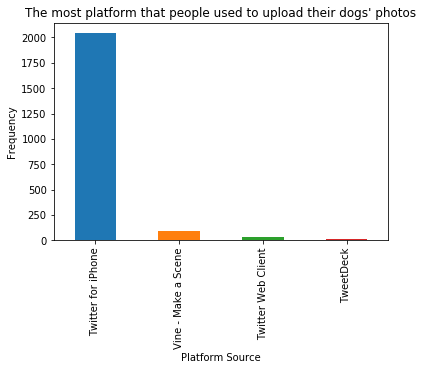

In [80]:
import matplotlib.pyplot as plt
%matplotlib inline

data_df = twitter_df.source.value_counts()
data_df.plot(kind = 'bar', title = "The most platform that people used to upload their dogs' photos")
plt.xlabel('Platform Source')
plt.ylabel('Frequency');
plt.savefig("output1.jpg")

##### Twitter app is the most platform used by dogs' owners to post their dogs' photos by a large margin compared to the other platforms, Vine comes after it, then twitter website, and the last one is TweetDeck. So, we can summarize that dogs' owners likely post their dogs' photos using Twitter app by iPhone.

#### Which dog breed has the most posted photos in WeRateDogs account ?

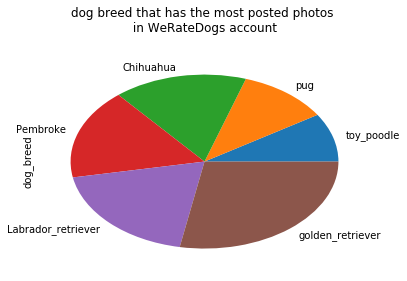

In [81]:
dog_breed_col = twitter_df.groupby('dog_breed').filter(lambda x: len(x) >= 50 and len(x) < 300 )
dog_breed_col['dog_breed'].value_counts().sort_values(ascending= True).plot(kind = 'pie', title = 'dog breed that has the most posted photos \n in WeRateDogs account \n')
plt.savefig("output2.jpg")

##### The most common dog breed is the Golden Retriever, then the Labrador Retriever. We can summarize that the dogs' owners of Golden retriever breed are the most likely to other dog breeds that their owners are most likely to post their dogs photos.

#### Comparison between Retweets and Favorites (likes) from november/2015 up to august/2017

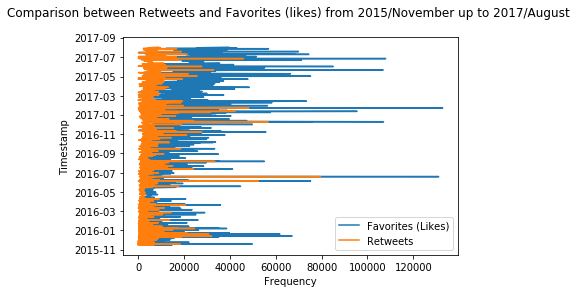

In [82]:
retweets = twitter_df.retweet_count
likes = twitter_df.favorite_count
time = twitter_df.timestamp
plt.plot(likes,time,label='Favorites (Likes)')
plt.plot(retweets,time,label='Retweets')
plt.title('Comparison between Retweets and Favorites (likes) from 2015/November up to 2017/August \n')
plt.xlabel('Frequency')
plt.ylabel('Timestamp');
plt.legend()
plt.show()
plt.savefig("output3.jpg")

##### It's clear that people interact to WeRateDogs posts more with hitting the Favorite button than the Retweet button, by approximately 50% and up to 75% in that time period. So, we can summarize that people react with WeRateDogs posts with Favorites more than Retweets.

In [89]:
from wordcloud import WordCloud, STOPWORDS

#text = open('tweet-json copy', mode='r',encoding='utf-8').read()
text = twitter_df['dog_breed'].to_string()
stopwords = STOPWORDS
print(stopwords)

{'http', "isn't", "it's", 'like', "hadn't", 'that', "what's", "how's", "you're", 'be', 'any', 'also', 'ever', 'however', "here's", "where's", "they'll", 'can', 'i', 'herself', 'were', "they're", 'ours', 'some', 'their', 'him', 'here', 'have', 'was', 'themselves', 'because', 'again', 'do', "shan't", "wasn't", "don't", 'he', 'k', 'her', 'most', 'further', 'down', 'own', 'until', "he'll", "we'd", 'in', 'which', 'since', 'against', 'same', 'ought', 'could', 'over', "when's", 'there', 'www', "there's", 'and', "mustn't", 'only', "we'll", "hasn't", 'from', "he'd", "he's", 'where', 'below', 'through', "who's", 'theirs', 'while', 'they', "haven't", 'but', 'myself', 'should', 'a', 'very', 'did', 'who', "i'd", 'up', 'when', 'been', "you'll", 'how', 'each', 'whom', 'we', 'why', 'no', 'you', 'is', "i'll", 'off', 'his', "she'll", 'are', 'into', 'between', 'our', 'more', "won't", 'so', 'both', 'its', 'by', "let's", 'few', 'these', 'at', 'being', 'get', 'or', 'yours', 'just', 'yourself', 'an', "they'v

In [90]:
words =WordCloud(
    background_color='white',
    stopwords=stopwords,
    width=350,
    height= 550
)

words.generate(text)
words.to_file("wordcloud_cover.jpg")

#### Resources:
        * BeautifulSoup, ps4 documents
        * Pandas documents
        * Lambda usage in Pandas
        * Pandas Plot
        * Matplotlib pyplot
        * WordCloud in Python
        